In [119]:
import numpy as np
import matplotlib.pyplot as plt


In [120]:
# Number of arms (slot machines)
n_arms = 3

In [121]:
# True probabilities of rewards for each arm (These are unknown to the algorithm)
true_probs = [0.8, 0.9, 0.9]

In [122]:
# Initialize Thompson Sampling variables:
# successes[i] stores how many times arm i gave a reward
# failures[i] stores how many times arm i did not give a reward
successes = np.zeros(n_arms)  # Success counts for each arm
failures = np.zeros(n_arms)   # Failure counts for each arm

In [123]:
# Total number of trials (pulling arms)
n_trials = 1000

In [124]:
# List to store the arm chosen at each trial
chosen_arms = []

In [125]:
# Function to simulate pulling an arm (returns 1 for reward, 0 for no reward)
def pull_arm(prob):
    return 1 if np.random.rand() < prob else 0

In [126]:
# Thompson Sampling Simulation
for trial in range(n_trials):
    # Draw a sample from the Beta distribution for each arm
    # Beta(successes + 1, failures + 1) gives the estimated reward probability for each arm
    sampled_theta = np.random.beta(successes + 1, failures + 1)

    # Choose the arm with the highest sampled value
    chosen_arm = np.argmax(sampled_theta)

    # Simulate pulling the chosen arm and receiving a reward or failure
    reward = pull_arm(true_probs[chosen_arm])

    # Store the chosen arm
    chosen_arms.append(chosen_arm)

    # Update the success or failure counts for the chosen arm
    if reward == 1:
        successes[chosen_arm] += 1
    else:
        failures[chosen_arm] += 1

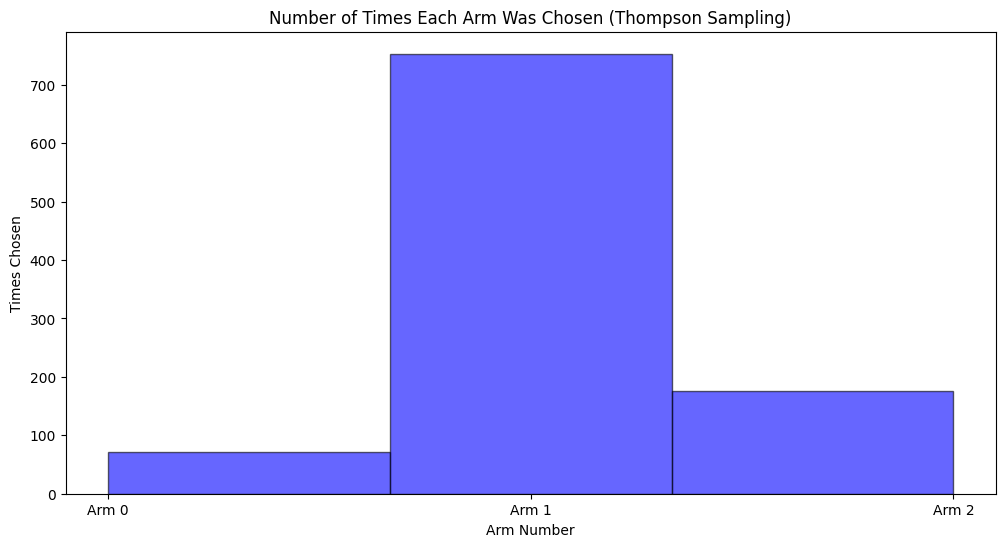


=== Final Success-Failure Statistics ===
Arm 0: Successes = 58.0, Failures = 13.0
Arm 1: Successes = 679.0, Failures = 74.0
Arm 2: Successes = 158.0, Failures = 18.0

=== Performance Summary ===
Arm 0: True Probability = 0.8, Estimated Probability = 0.817
Arm 1: True Probability = 0.9, Estimated Probability = 0.902
Arm 2: True Probability = 0.9, Estimated Probability = 0.898


In [127]:
# Visualizing the Results

# Create a histogram showing how many times each arm was chosen
plt.figure(figsize=(12, 6))
plt.hist(chosen_arms, bins=n_arms, alpha=0.6, color='b', edgecolor='black')
plt.title('Number of Times Each Arm Was Chosen (Thompson Sampling)')
plt.xlabel('Arm Number')
plt.ylabel('Times Chosen')
plt.xticks(range(n_arms), [f'Arm {i}' for i in range(n_arms)])  # Label the arms
plt.show()

# Final Success and Failure Statistics
print("\n=== Final Success-Failure Statistics ===")
for i in range(n_arms):
    print(f"Arm {i}: Successes = {successes[i]}, Failures = {failures[i]}")

# Performance Summary
print("\n=== Performance Summary ===")
for i in range(n_arms):
    print(f"Arm {i}: True Probability = {true_probs[i]}, Estimated Probability = {successes[i] / (successes[i] + failures[i]):.3f}")
